## Euclidean and Manhattan Distance Calculations

In this short mini project you will see examples and comparisons of distance measures. Specifically, you'll visually compare the Euclidean distance to the Manhattan distance measures. The application of distance measures has a multitude of uses in data science and is the foundation of many algorithms you'll be using such as Prinical Components Analysis.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')

In [19]:
# Load Course Numerical Dataset
df = pd.read_csv('data/distance_dataset.csv',index_col=0)
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


### Euclidean Distance

Let's visualize the difference between the Euclidean and Manhattan distance.

We are using Pandas to load our dataset .CSV file and use Numpy to compute the __Euclidean distance__ to the point (Y=5, Z=5) that we choose as reference. On the left here we show the dataset projected onto the YZ plane and color coded per the Euclidean distance we just computed. As we are used to, points that lie at the same Euclidean distance define a regular 2D circle of radius that distance.

Note that the __SciPy library__ comes with optimized functions written in C to compute distances (in the scipy.spatial.distance module) that are much faster than our (naive) implementation.

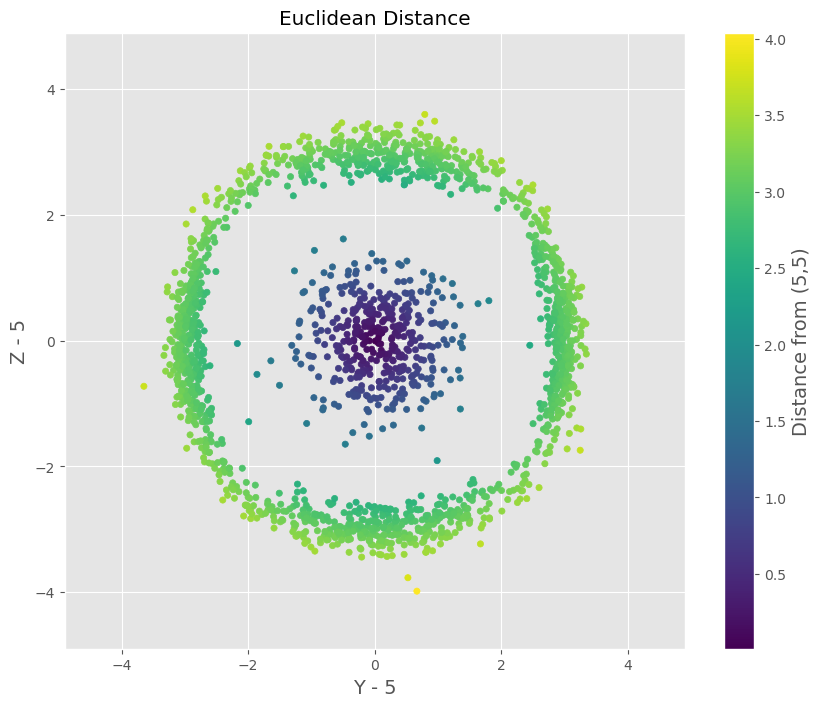

In [20]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distEuclid = np.sqrt((df.Z - 5)**2 + (df.Y - 5)**2)

figEuclid = plt.figure(figsize=[10,8])

plt.scatter(df.Y - 5, df.Z-5, c=distEuclid, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Euclidean Distance')
cb = plt.colorbar()
cb.set_label('Distance from (5,5)', size=14)
plt.show()

**<font color='teal'>Create a distance to reference point (3,3) matrix similar to the above example.</font>**

In [24]:
# In the Y-Z plane, we compute the distance to ref point (3,3)

# Define the new reference point
ref_y = 3
ref_z = 3

# In the Y-Z plane, we compute the Euclidean distance to the new ref point (3,3)
distEuclid_3x3 = np.sqrt((df.Z - ref_z)**2 + (df.Y - ref_y)**2)

**<font color='teal'>Replace the value set to 'c' in the plotting cell below with your own distance matrix and review the result to deepen your understanding of Euclidean distances. </font>**

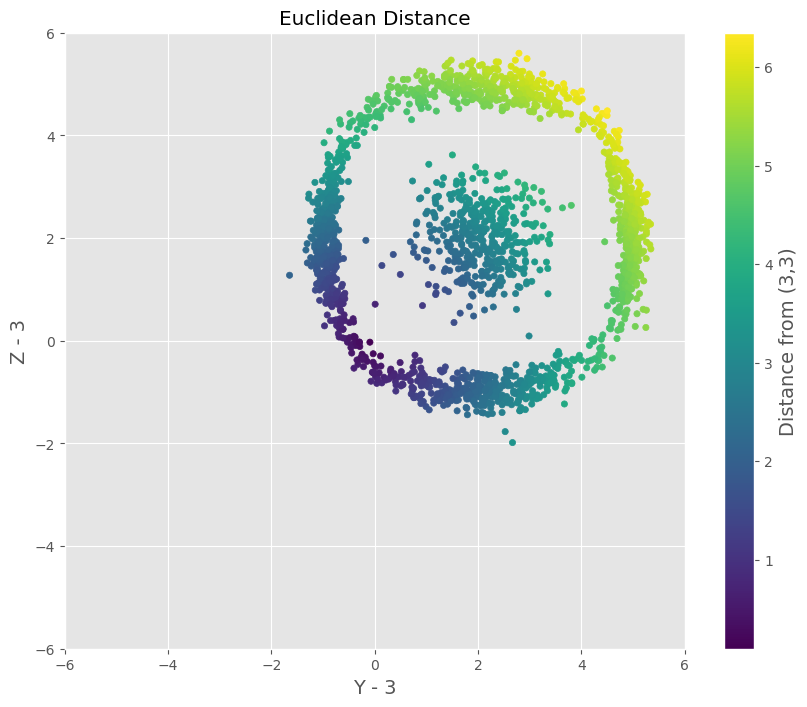

In [26]:
figEuclid = plt.figure(figsize=[10,8])

plt.scatter(df.Y - 3, df.Z-3, c=distEuclid_3x3, s=20)
plt.ylim([-6,6])
plt.xlim([-6,6])
plt.xlabel('Y - 3', size=14)
plt.ylabel('Z - 3', size=14)
plt.title('Euclidean Distance')
cb = plt.colorbar()
cb.set_label('Distance from (3,3)', size=14)
plt.show()
#figEuclid.savefig('plots/Euclidean.png')

### Manhattan Distance

Manhattan distance is simply the sum of absolute differences between the points coordinates. This distance is also known as the taxicab or city block distance as it measure distances along the coorinate axis which creates "paths" that look like a cab's route on a grid-style city map.

We display the dataset projected on the XZ plane here color coded per the Manhattan distance to the (X=5, Z=5) reference point. We can see that points laying at the same distance define a circle that looks like a Euclidean square.

In [27]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distManhattan = np.abs(df.X - 5) + np.abs(df.Z - 5)

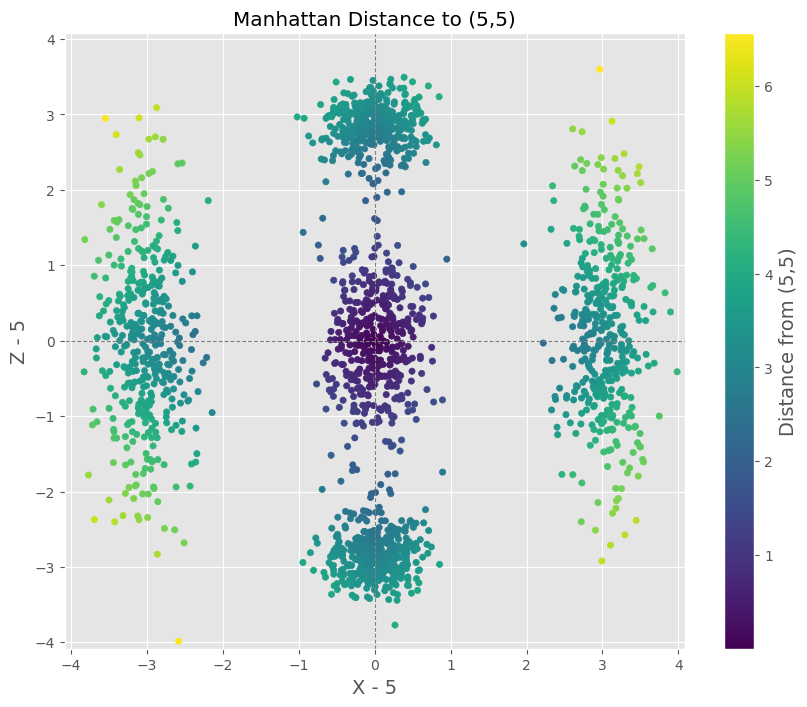

First 5 calculated Manhattan distances to (5,5):
0    0.923415
1    1.810324
2    5.081859
3    1.238538
4    3.739102
dtype: float64


In [32]:
# Define the reference point for Manhattan distance
ref_x = 5
ref_z = 5

# Compute the Manhattan distance to the reference point (5,5) in the X-Z plane
distManhattan = np.abs(df.X - ref_x) + np.abs(df.Z - ref_z)

# Create the figure for the plot
figManhattan = plt.figure(figsize=[10,8])

# Scatter plot:
# - X-axis: X coordinates shifted by -ref_x (to center the plot at 0,0 relative to the reference point)
# - Y-axis: Z coordinates shifted by -ref_z (to center the plot at 0,0 relative to the reference point)
# - 'c=distManhattan': Colors the points based on their calculated Manhattan distance
# - 's=20': Sets the size of the markers
plt.scatter(df.X - ref_x, df.Z - ref_z, c=distManhattan, s=20)

# Set plot limits (adjust based on your data if needed, these are general)
# The limits are set dynamically based on the maximum absolute difference from the reference point
max_diff_x = abs(df.X - ref_x).max()
max_diff_z = abs(df.Z - ref_z).max()
plot_limit = max(max_diff_x, max_diff_z) + 0.1 # Add a small buffer for aesthetics

plt.ylim([-plot_limit, plot_limit])
plt.xlim([-plot_limit, plot_limit])


# Add labels and title
plt.xlabel(f'X - {ref_x}', size=14)
plt.ylabel(f'Z - {ref_z}', size=14)
plt.title(f'Manhattan Distance to ({ref_x},{ref_z})')

# Add a color bar to explain the distance coloring
cb = plt.colorbar()
cb.set_label(f'Distance from ({ref_x},{ref_z})', size=14)

# Add grid and origin lines for better visualization
plt.grid(True)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Display the plot
plt.show()

print(f"First 5 calculated Manhattan distances to ({ref_x},{ref_z}):")
print(distManhattan.head())

**<font color='teal'>Create a Manhattan distance to reference point (4,4) matrix similar to the above example and replace the value for 'c' in the plotting cell to view the result.</font>**

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

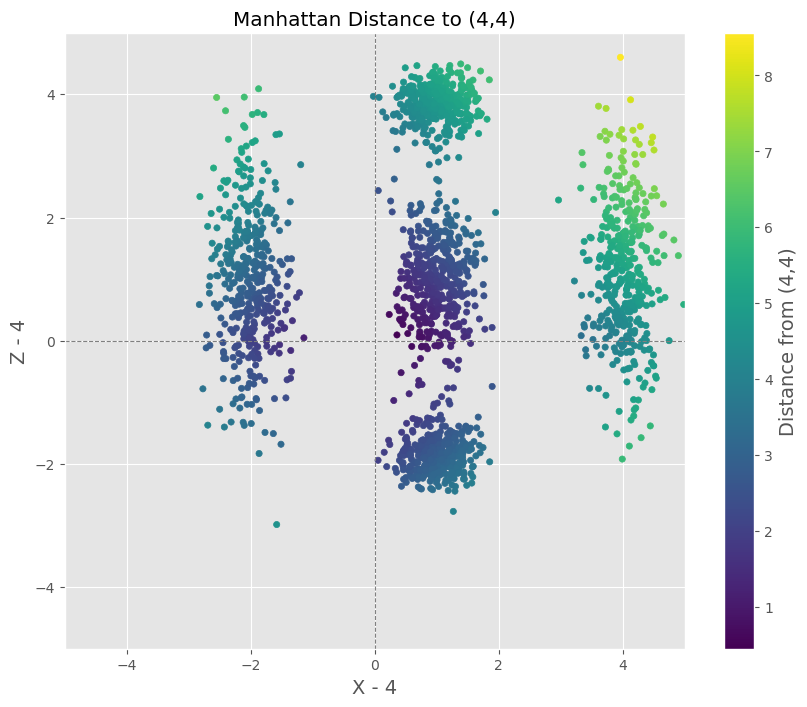

Computed Manhattan distances to (4,4):
0    2.923415
1    2.371765
2    5.081859
3    3.238538
4    1.739102
dtype: float64


In [30]:
# --- Create Manhattan distance to reference point (4,4) ---

# Define the new reference point
ref_x = 4
ref_z = 4

# Compute the Manhattan distance to the new reference point (4,4) in the X-Z plane
distManhattan_new_ref = np.abs(df.X - ref_x) + np.abs(df.Z - ref_z)

# --- Visualize the result ---
figManhattan_new_ref = plt.figure(figsize=[10,8])

# Plot points relative to the new reference point (4,4)
# 'c' is replaced with 'distManhattan_new_ref' to color code by the new distance
plt.scatter(df.X - ref_x, df.Z - ref_z, c=distManhattan_new_ref, s=20)

# Adjust plot limits if necessary to center around (0,0) after shifting
# Assuming original data ranges roughly from 0 to 10 based on typical datasets
plt.ylim([-max(abs(df.Z - ref_z).max(), 5), max(abs(df.Z - ref_z).max(), 5)])
plt.xlim([-max(abs(df.X - ref_x).max(), 5), max(abs(df.X - ref_x).max(), 5)])

plt.xlabel(f'X - {ref_x}', size=14)
plt.ylabel(f'Z - {ref_z}', size=14)
plt.title(f'Manhattan Distance to ({ref_x},{ref_z})')
cb = plt.colorbar()
cb.set_label(f'Distance from ({ref_x},{ref_z})', size=14)
plt.grid(True) # Add grid for better visualization
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8) # Add line for new X-axis origin
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Add line for new Z-axis origin
plt.show()

print(f"Computed Manhattan distances to ({ref_x},{ref_z}):")
print(distManhattan_new_ref.head()) # Display the first few calculated distances

Now let's create distributions of these distance metrics and compare them. We leverage the scipy dist function to create these matrices similar to how you manually created them earlier in the exercise.

In [33]:
import scipy.spatial.distance as dist

mat = df[['X','Y','Z']].to_numpy()
DistEuclid = dist.pdist(mat,'euclidean')
DistManhattan = dist.pdist(mat, 'cityblock')
largeMat = np.random.random((10000,100))

**<font color='teal'>Plot histograms of each distance matrix for comparison.</font>**

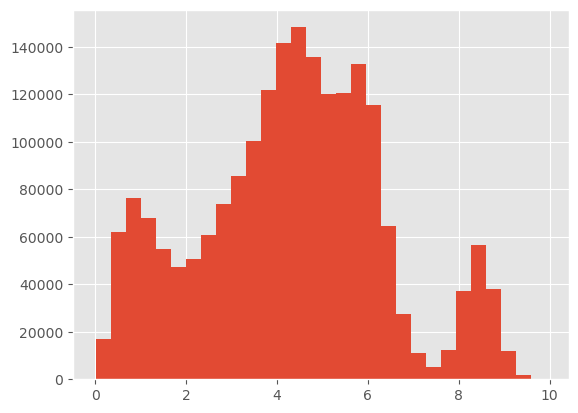

In [38]:
plt.hist(DistEuclid,bins=30)
plt.show()

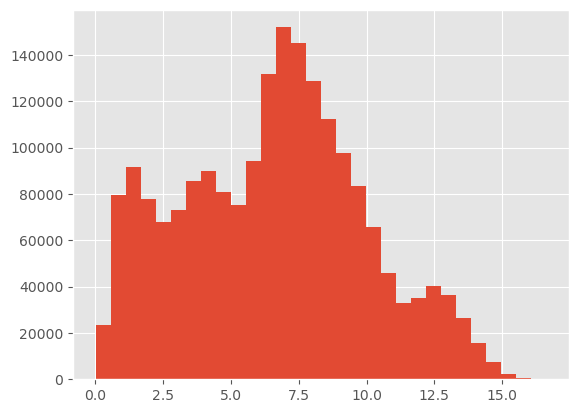

In [37]:
plt.hist(DistManhattan,bins=30)
plt.show()